In [84]:
import pandas as pd
import statistics as stats
import numpy as np

In [85]:
dff = pd.read_csv('data_science_job.csv')

In [86]:
dff.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [87]:
df = dff.copy()   

In [88]:
df.drop_duplicates(inplace=True)

In [89]:
df.drop(columns=['salary'], axis=1, inplace=True)  # there are 2 columns, salary and salary in usd. so we can drop salary column, take only salary_in_usd  for analysis

In [90]:
df.drop(columns=['salary_currency'], axis=1, inplace=True)

In [91]:
df.isnull().sum()

work_year               0
job_title               0
job_category          500
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [92]:
df['job_category'].value_counts()

job_category
Data Science    1173
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64

In [93]:
df['job_title'].value_counts()

job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Statistician  (Remote)                  323
Statistician  in office                 317
Data Scientist  (Remote)                310
Data Analyst                            309
Machine Learning Engineer               306
Name: count, dtype: int64

In [94]:
def fill_job_category(row):
    if pd.isna(row['job_category']):
        title = row['job_title'].lower()
        if 'data scientist' in title:
            return 'Data Science'
        elif 'machine learning' in title or 'ml' in title or 'artificial intelligence' in title or 'ai' in title:
            return 'ML/AI'
        elif 'analyst' in title:
            return 'Analysis'
        elif 'engineer' in title:
            return 'Engineering'
        else:
            return df['job_category'].mode()[0]
    return row['job_category']
df['job_category'] = df.apply(fill_job_category, axis=1)

In [95]:
df['job_category'].value_counts()

job_category
Data Science    1372
ML/AI           1266
Analysis        1194
Engineering     1168
Name: count, dtype: int64

In [96]:
df['experience_level'].value_counts()

experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64

In [97]:
print(df['experience_level'].value_counts(normalize=True))     # experience levels are almost perfectly balanced. cant use mode here.

experience_level
SE    0.256444
EX    0.248667
EN    0.247778
MI    0.247111
Name: proportion, dtype: float64


In [98]:
# using random sampling to replace missing data.

curr_dist = df['experience_level'].value_counts(normalize=True)  # current distribution
missing_count = df['experience_level'].isna().sum()   # counting how many values are missing
random_values = np.random.choice(
    curr_dist.index,   # the categories like SE, EX, EN, MI
    size = missing_count,     # how many random vals to generate
    p = curr_dist.values     # probability of each.
)
df.loc[df['experience_level'].isna(), 'experience_level'] = random_values  # df.loc[condition, column] -> Access those specific rows

In [99]:
df['experience_level'].value_counts()

experience_level
SE    1294
EN    1246
EX    1232
MI    1228
Name: count, dtype: int64

In [100]:
print(df['company_size'].value_counts(normalize=True))  # here too we cant use mode! equally dist data. using random sampling here too.

company_size
S    0.337556
M    0.337111
L    0.325333
Name: proportion, dtype: float64


In [101]:
current_dist = df['company_size'].value_counts(normalize=True)  
missing_countt = df['company_size'].isna().sum()   
random_vals = np.random.choice(
    current_dist.index,   
    size = missing_countt,    
    p = current_dist.values     
)
df.loc[df['company_size'].isna(), 'company_size'] = random_vals

In [102]:
df['company_size'].value_counts()

company_size
S    1692
M    1671
L    1637
Name: count, dtype: int64

In [104]:
df['work_setting'].value_counts()

work_setting
Hybrid       1721
In-person    1658
Remote       1621
Name: count, dtype: int64

In [106]:
df = df[df['salary_in_usd']>0]

In [108]:
# outlier removal using IQR method
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
df = df[(df['salary_in_usd']>=lower_fence ) & (df['salary_in_usd']<=upper_fence)]

<Axes: ylabel='salary_in_usd'>

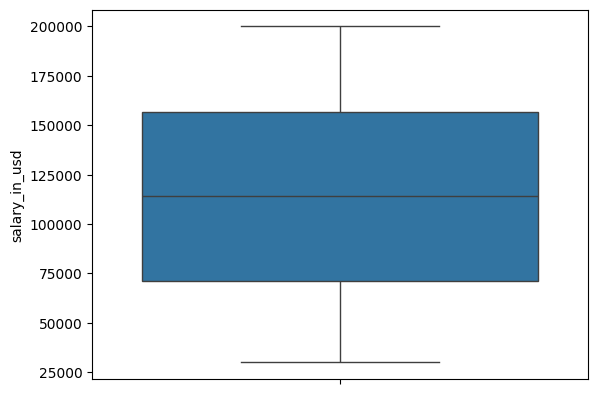

In [ ]:
import seaborn as sns 
sns.boxplot(data = df['salary_in_usd'])  # no outliers.

<Axes: ylabel='work_year'>

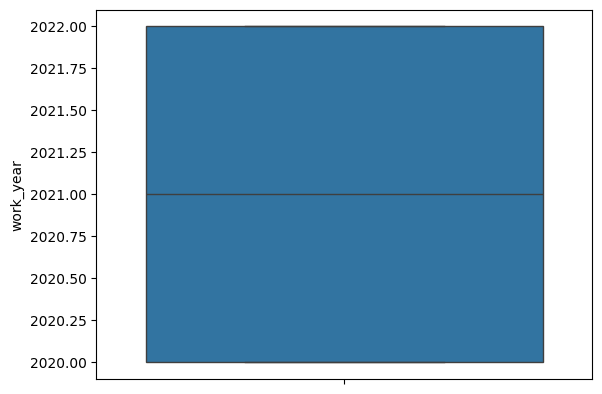

In [ ]:
sns.boxplot(data = df['work_year']) # no outliers.

In [113]:
# normalising for better understanding and readability.

experience_map = {
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior',
    'EX': 'Executive'
}
df['experience_level'] = df['experience_level'].map(experience_map)

In [115]:
employment_map = {
    'CT': 'Contract',
    'FL': 'Freelance',
    'FT': 'Full-Time',
    'PT': 'Part-Time'
}
df['employment_type'] = df['employment_type'].map(employment_map)

In [117]:
companysize_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large',
}
df['company_size'] = df['company_size'].map(companysize_map)

In [119]:
df['employee_residence'].value_counts()

employee_residence
JP    783
IN    741
US    721
DE    706
MX    705
CN    674
UK    670
Name: count, dtype: int64

In [120]:
df['company_location'].value_counts()

company_location
UK    789
DE    726
MX    713
IN    708
CN    697
US    684
JP    683
Name: count, dtype: int64

In [121]:
country_map = {
    'UK': 'United Kingdom',
    'IN': 'India',
    'US': 'United States',
    'DE': 'Germany',
    'MX': 'Mexico',
    'CN': 'China',
    'JP': 'Japan'
}
df['employee_residence'] = df['employee_residence'].map(country_map)
df['company_location'] = df['company_location'].map(country_map)

In [123]:
df['job_title'].value_counts()

job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Statistician  (Remote)                  323
Statistician  in office                 317
Data Scientist  (Remote)                310
Data Analyst                            309
Machine Learning Engineer               306
Name: count, dtype: int64

In [124]:
def clean_job_role(title):
    title = title.lower()
    if 'data engineer' in title:
        return 'Data Engineer'
    elif 'statistician' in title:
        return 'Statistician'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    else:
        return 'Other'
    
df['job_role'] = df['job_title'].apply(clean_job_role)

In [126]:
df.drop(columns='job_title', axis=1, inplace=True)

In [128]:
df.columns

Index(['work_year', 'job_category', 'salary_in_usd', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size', 'job_role'],
      dtype='object')

In [129]:
df = df[
    [
        'work_year',
        'job_role',
        'job_category',
        'experience_level',
        'employment_type',
        'work_setting',
        'company_location',
        'company_size',
        'salary_in_usd'
    ]
]


In [130]:
df

,work_year,job_role,job_category,experience_level,employment_type,work_setting,company_location,company_size,salary_in_usd
0,2022,Machine Learning Engineer,Analysis,Mid-Level,Contract,Remote,Germany,Large,136086
1,2020,Statistician,ML/AI,Executive,Freelance,Remote,India,Medium,67982
2,2022,Machine Learning Engineer,ML/AI,Mid-Level,Contract,Hybrid,China,Large,153309
3,2022,Data Analyst,ML/AI,Senior,Full-Time,Hybrid,Mexico,Large,135242
4,2020,Statistician,Data Science,Mid-Level,Full-Time,In-person,United Kingdom,Small,35156
...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer,ML/AI,Executive,Contract,In-person,India,Small,179111
4996,2021,Machine Learning Engineer,ML/AI,Entry-Level,Freelance,Remote,United Kingdom,Large,196373
4997,2022,Machine Learning Engineer,Analysis,Entry-Level,Freelance,Hybrid,Japan,Medium,51366
4998,2021,Statistician,Data Science,Mid-Level,Part-Time,Remote,Germany,Small,181817


In [131]:
df.to_csv("cleaned_jobs_data.csv", index=False)